In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.impute import KNNImputer

In [2]:
data = pd.read_csv('E Commerce Dataset.csv')

In [3]:
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [4]:
data.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000


### Extracting the numerical and Categorical columns

In [5]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [6]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

##### Dropping 'CustomerID' from numerical columns as it's an identifier, not a feature

In [7]:
numerical_cols.remove("CustomerID")
numerical_cols

['Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

## Univariate Analysis (Numerical Features)

In [8]:
# Defining the numerical columns to analyze
numerical_cols_to_analyze = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear',
    'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

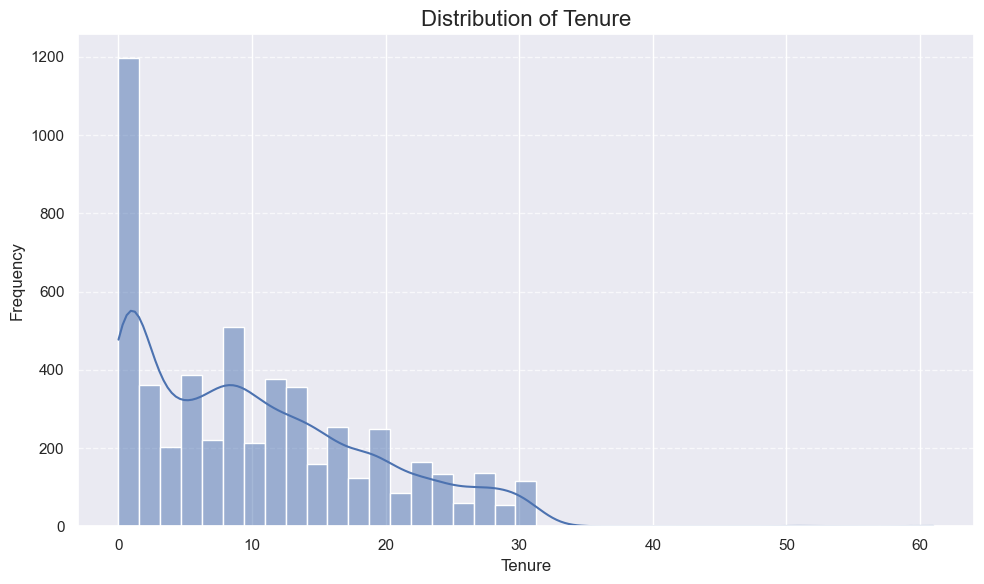

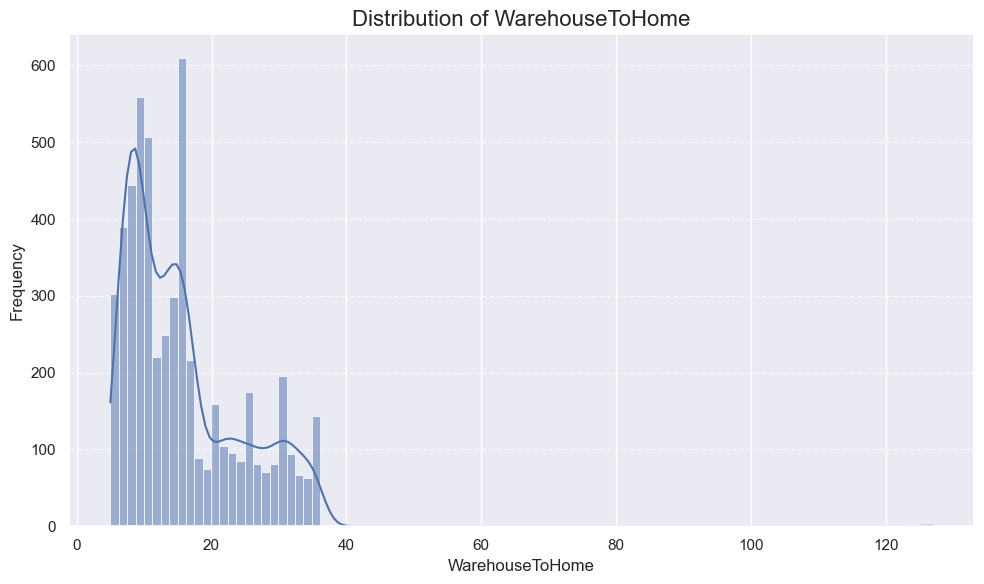

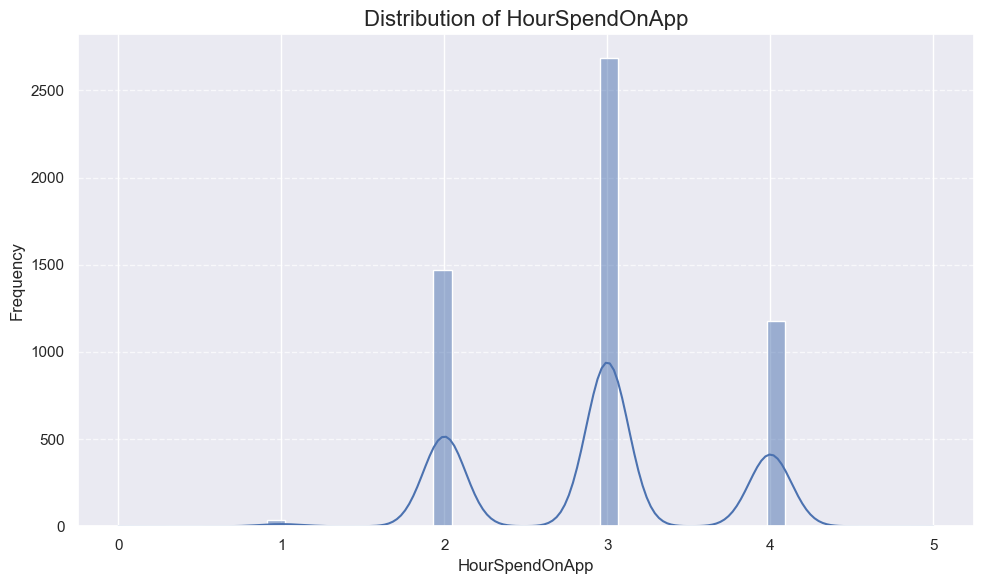

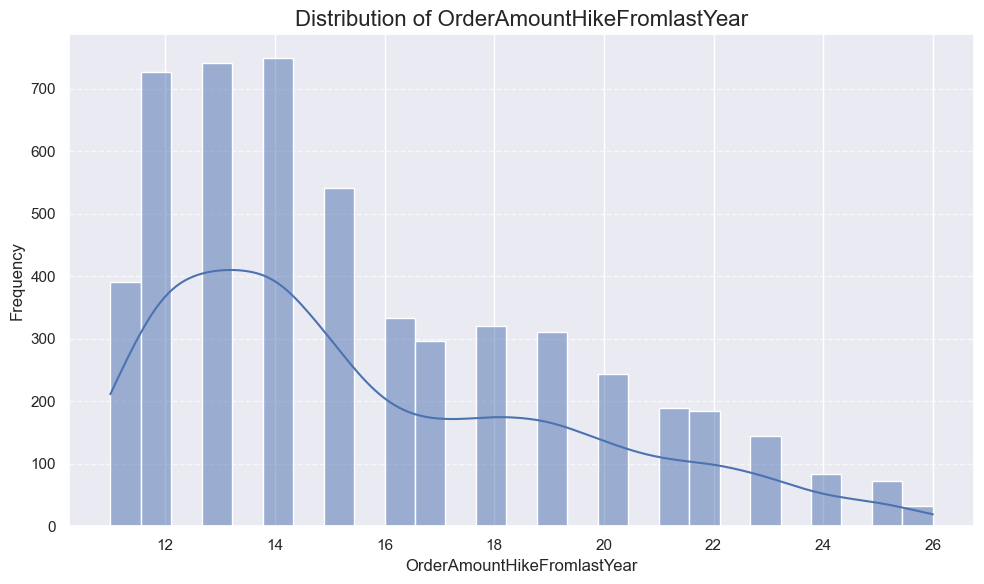

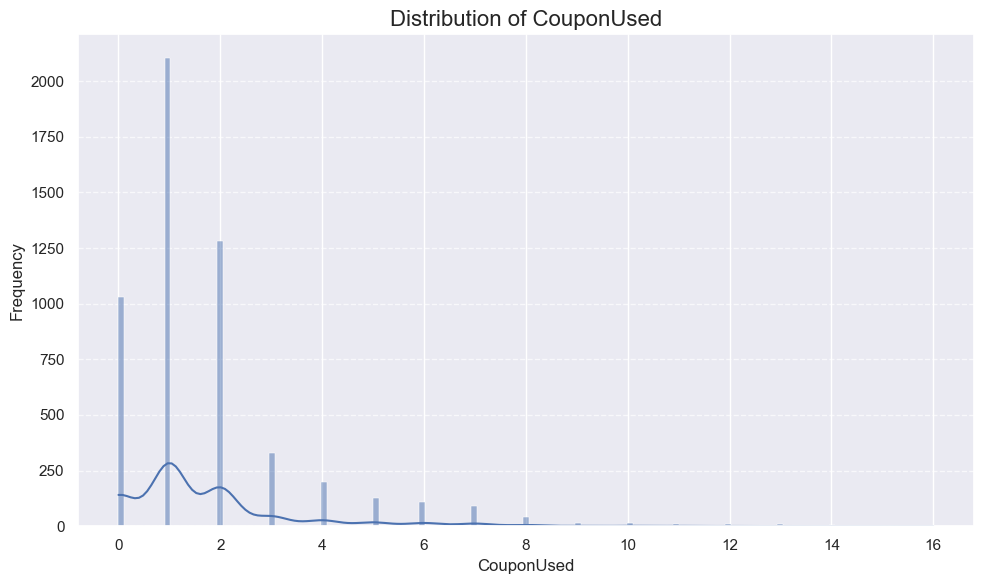

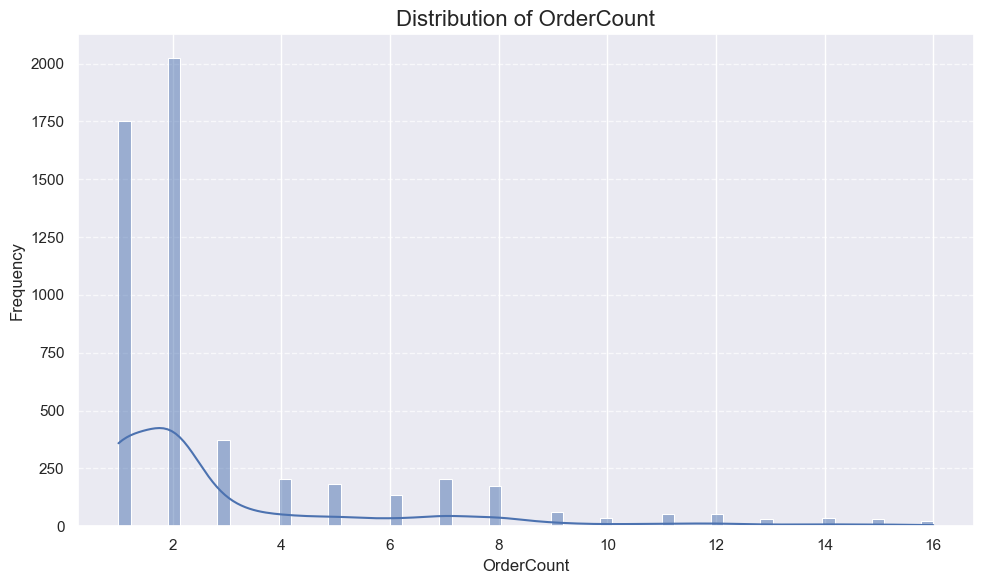

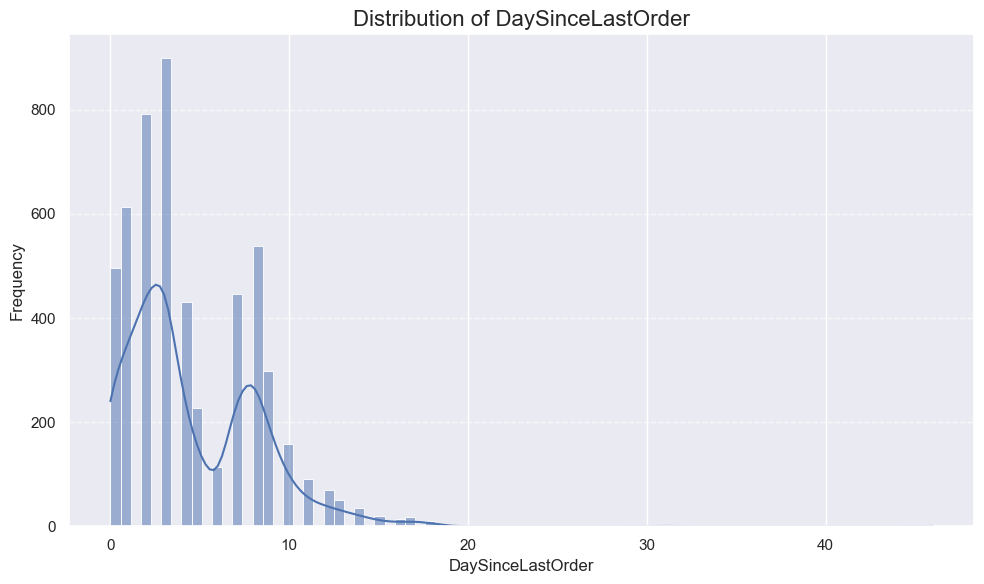

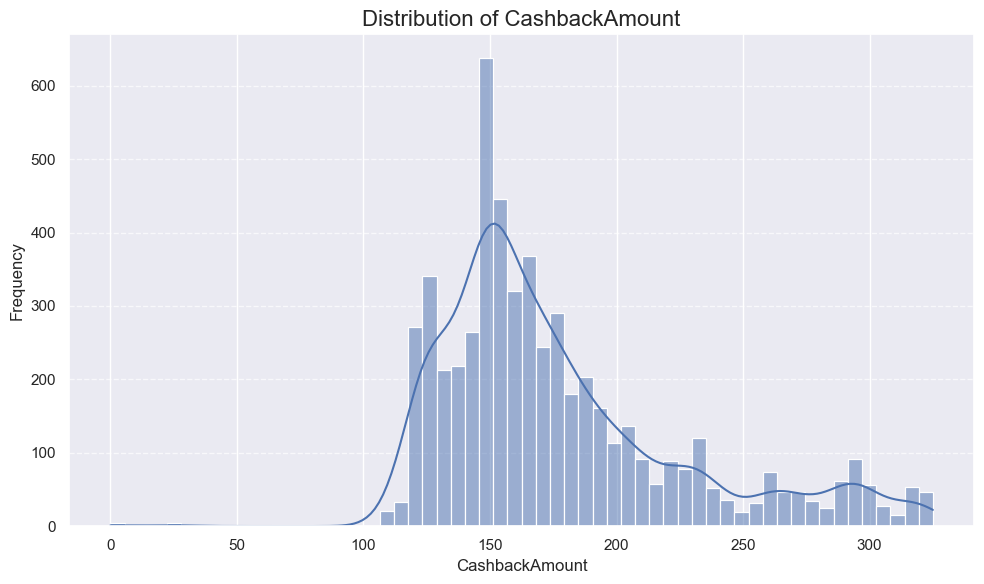

In [9]:
# Creating histograms for each numerical column
for col in numerical_cols_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{col}_distribution.png')
    plt.show()

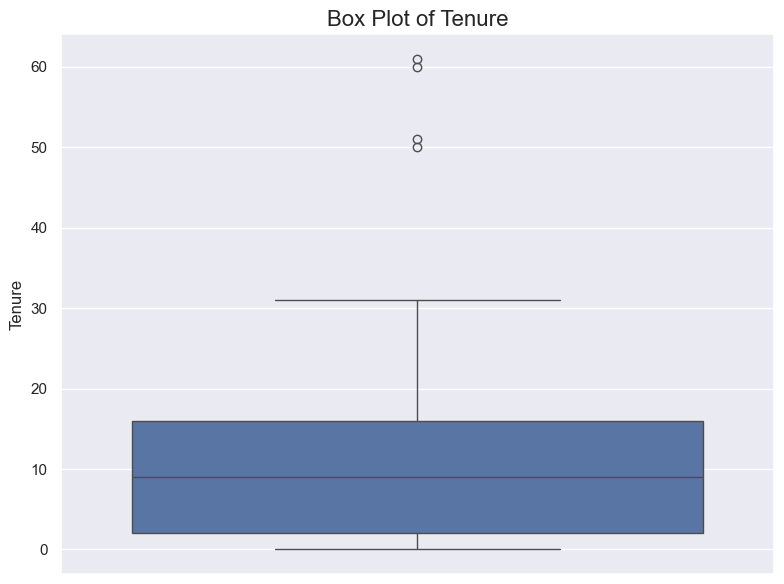

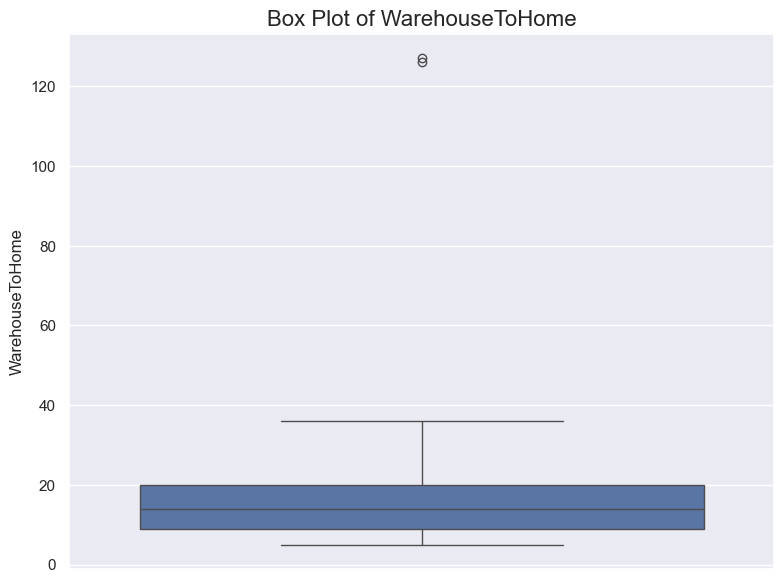

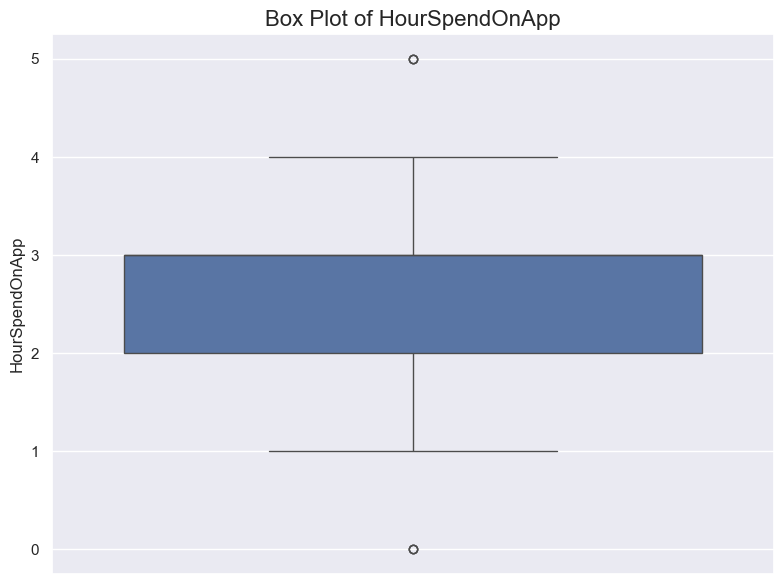

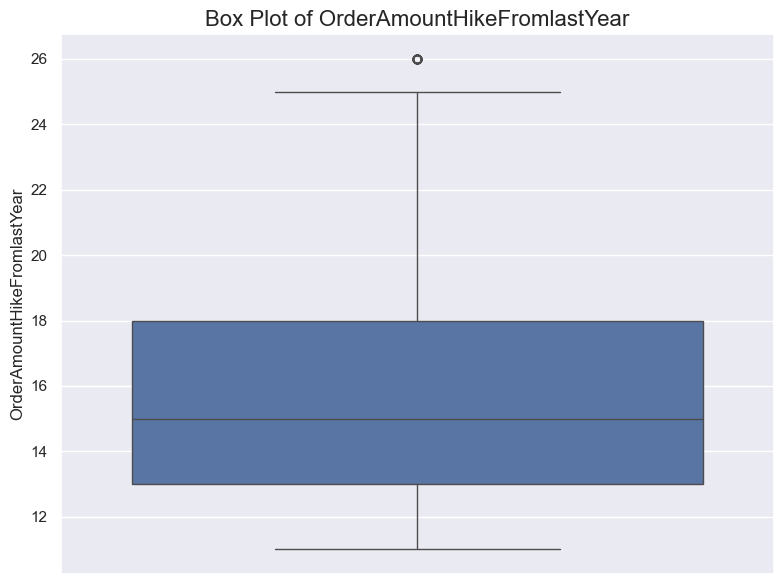

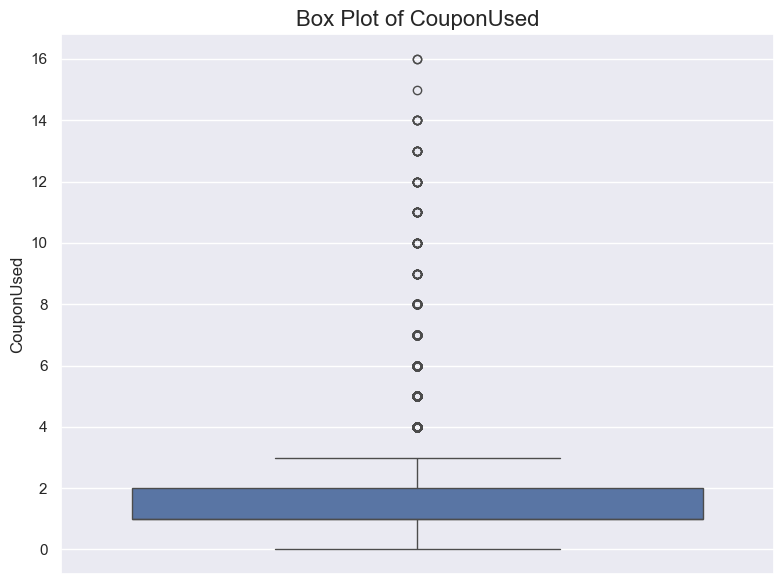

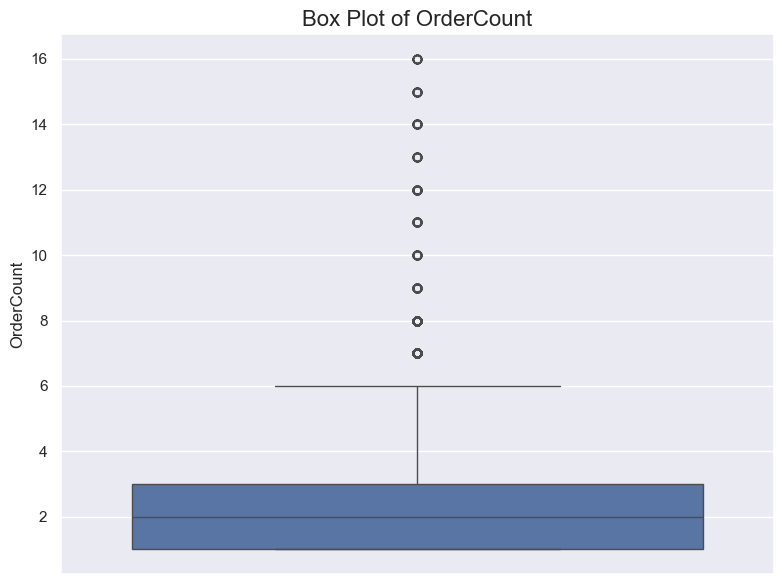

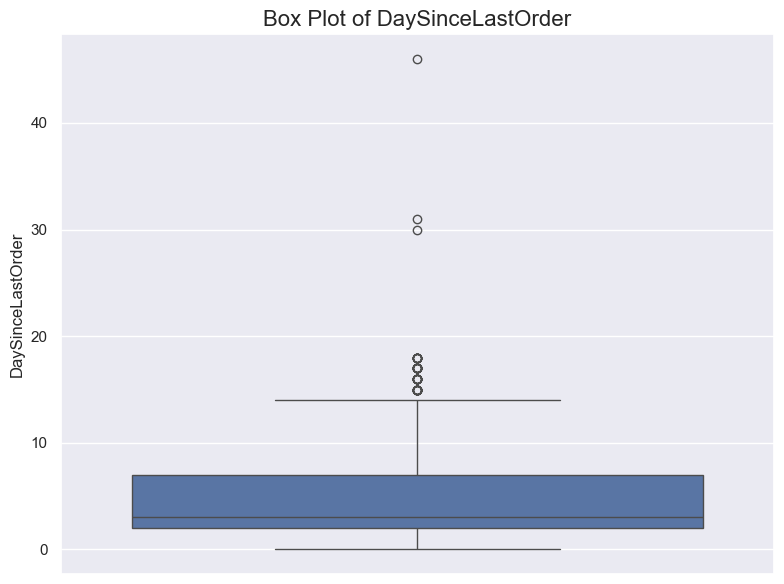

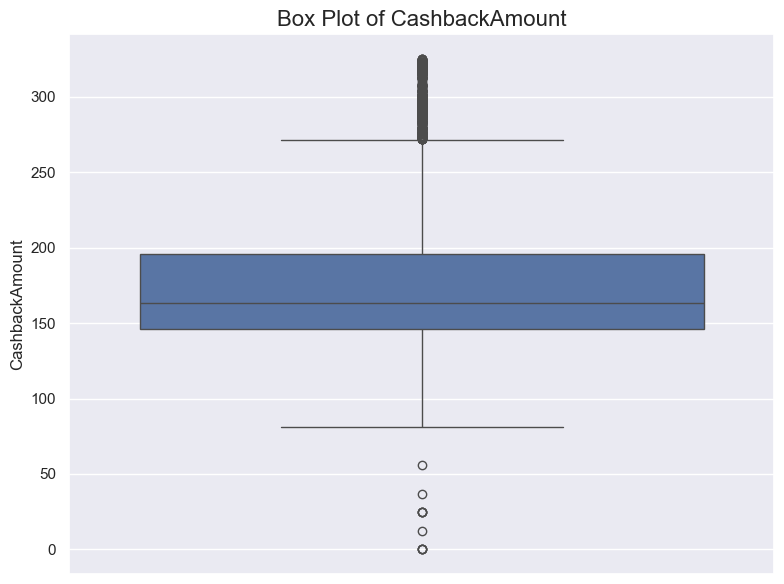

In [10]:
# Creating box plots to identify outliers for each numerical column
for col in numerical_cols_to_analyze:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=col)
    plt.title(f'Box Plot of {col}', fontsize=16)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.savefig(f'{col}_boxplot.png')
    plt.show()


## Univariate Analysis (Categorical Features)

In [11]:
# Defining the categorical columns to analyze
categorical_cols_to_analyze = [
    'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender',
    'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
    'MaritalStatus', 'Complain', 'Churn'
]


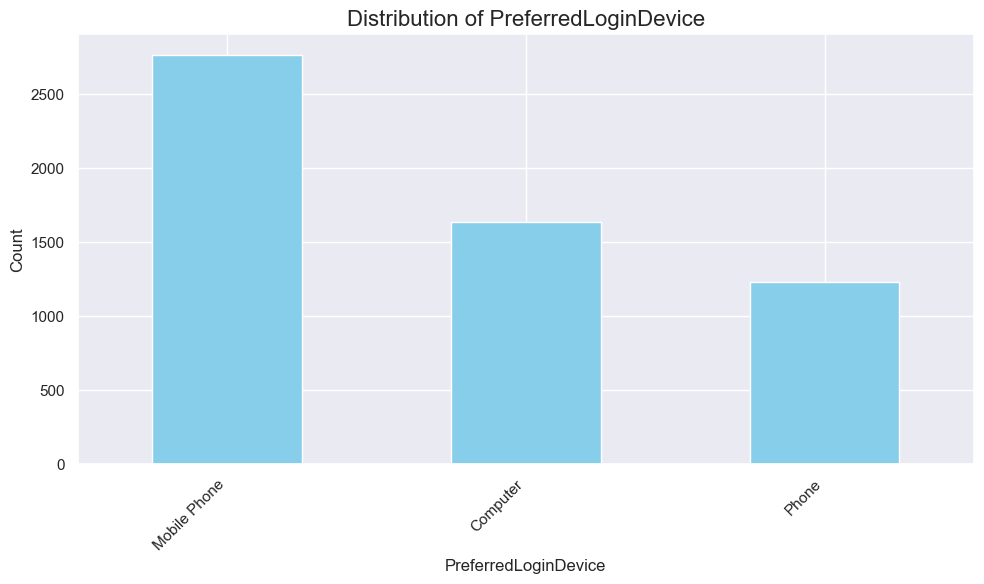

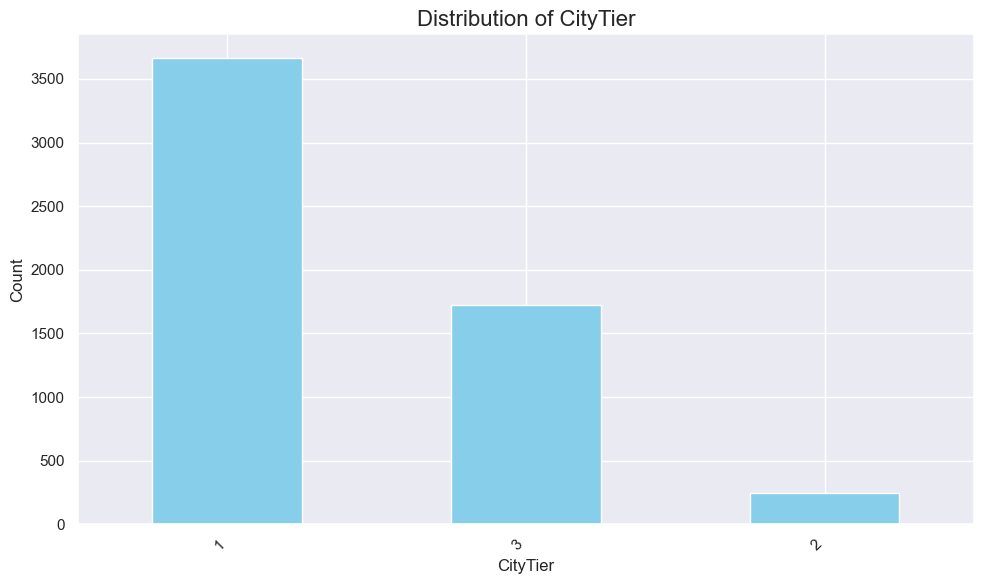

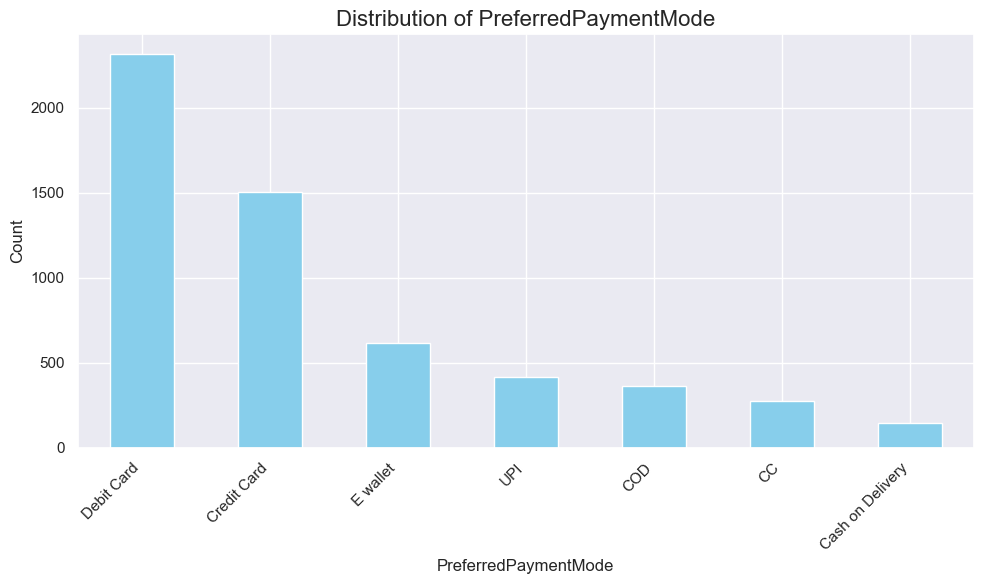

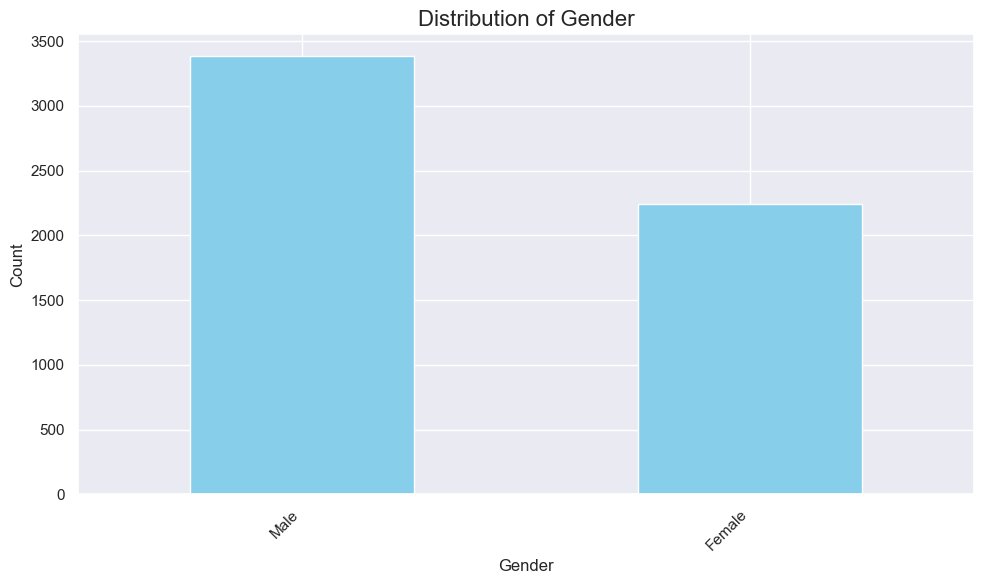

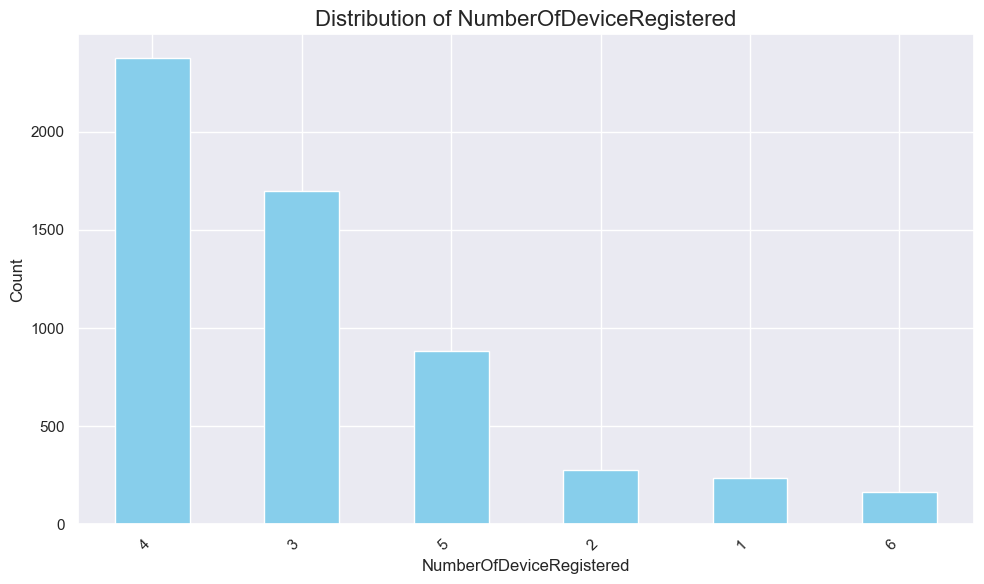

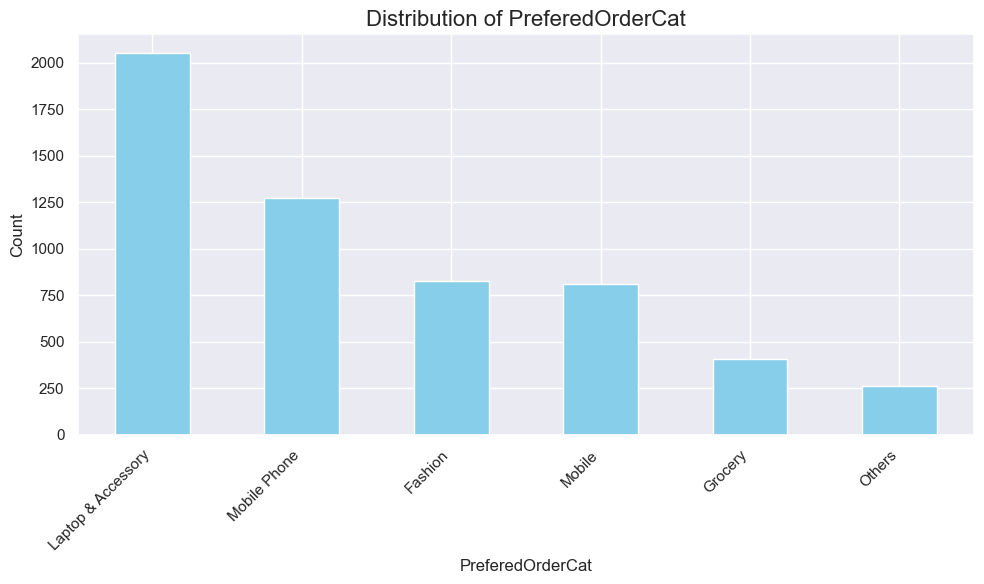

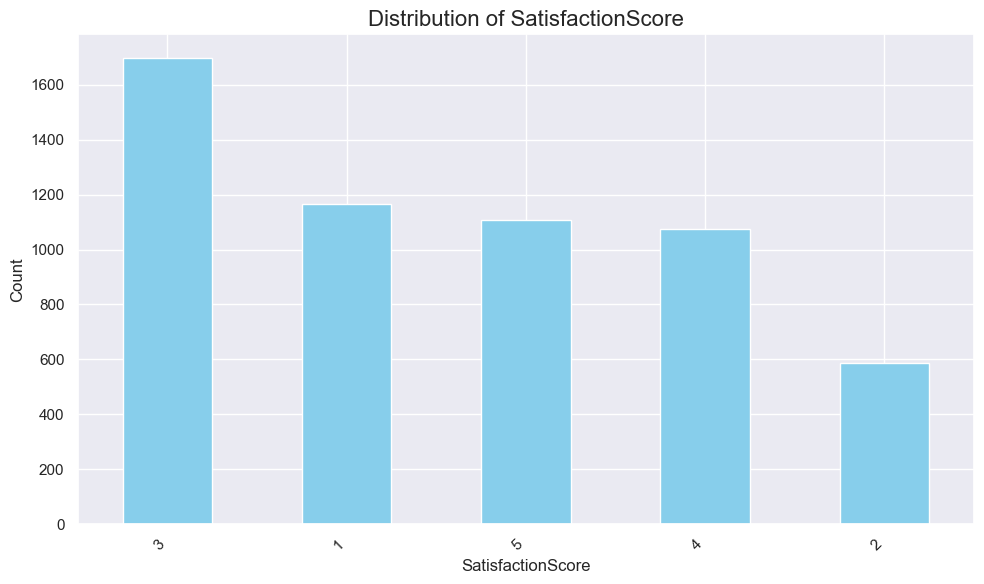

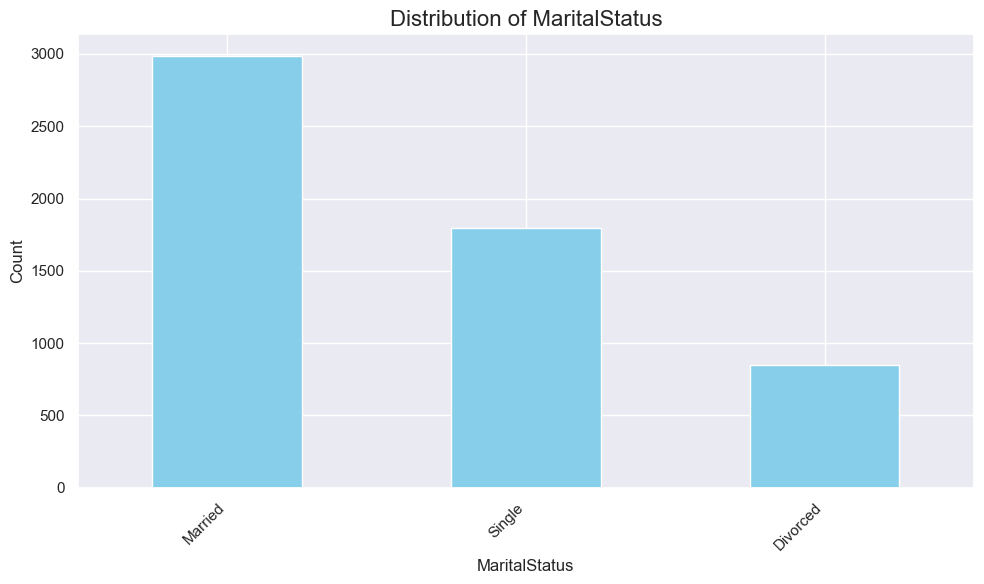

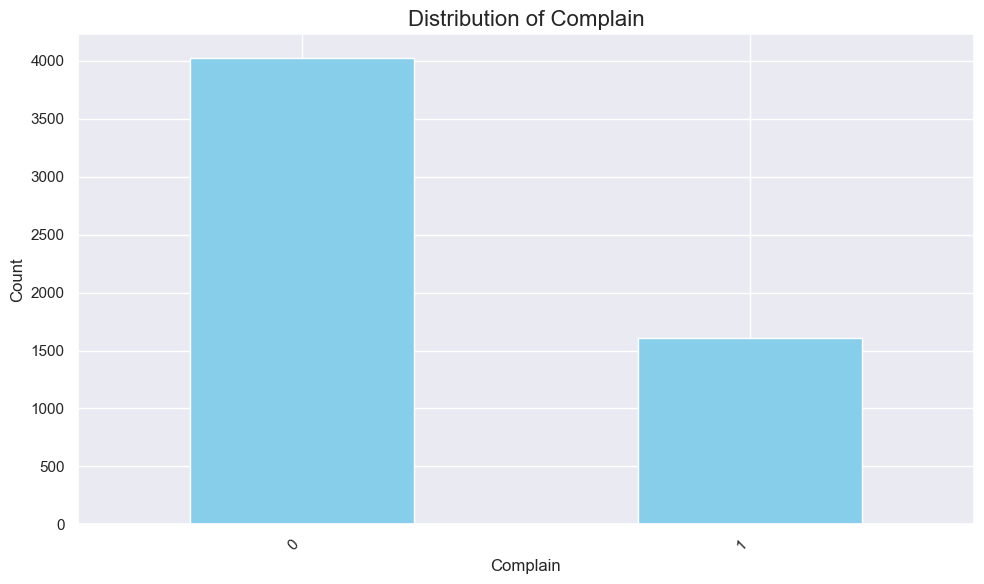

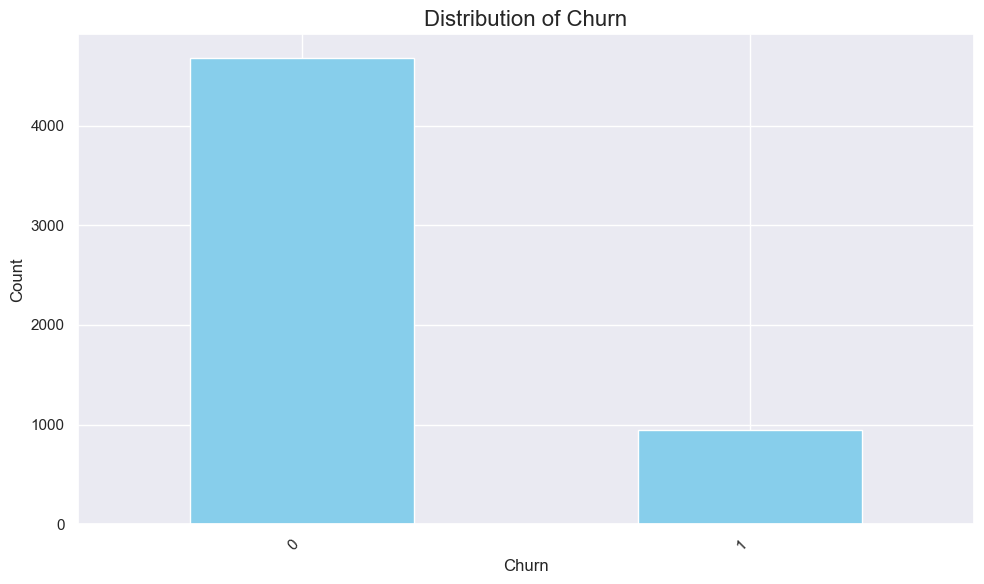

In [12]:
# Create bar charts for each categorical column
for col in categorical_cols_to_analyze:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{col}_bar_chart.png')
    plt.show()

## Bivariate Analysis (Numerical Features)

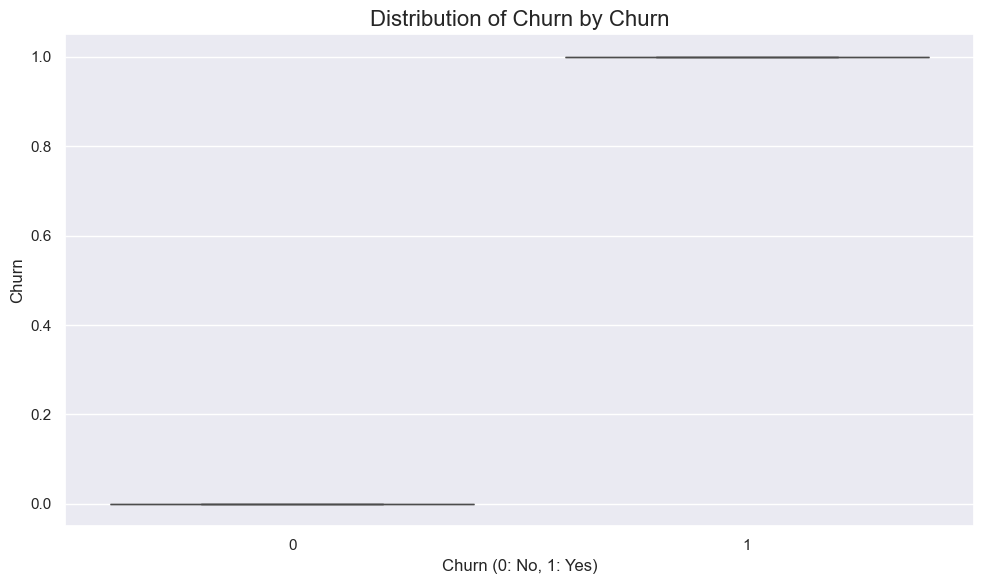

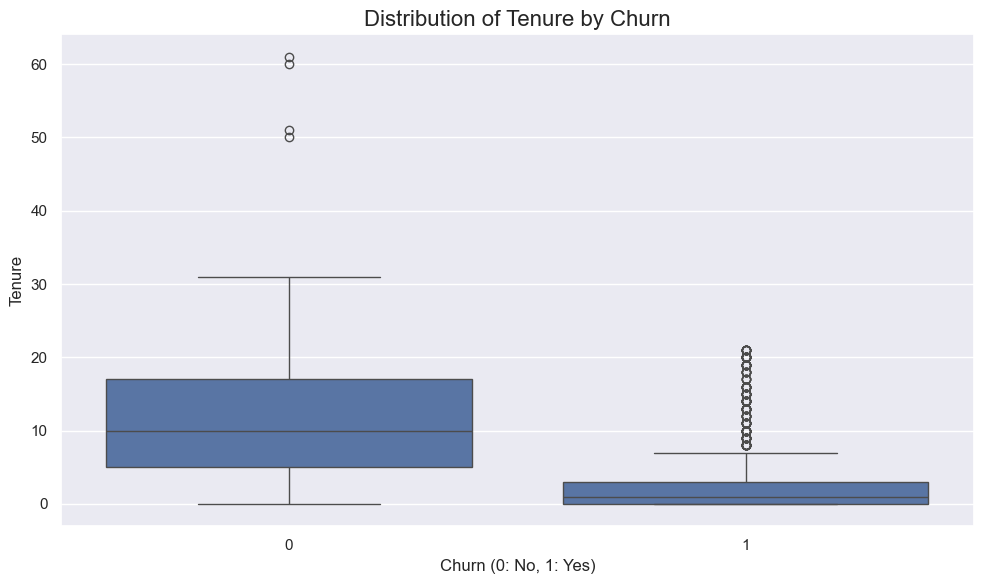

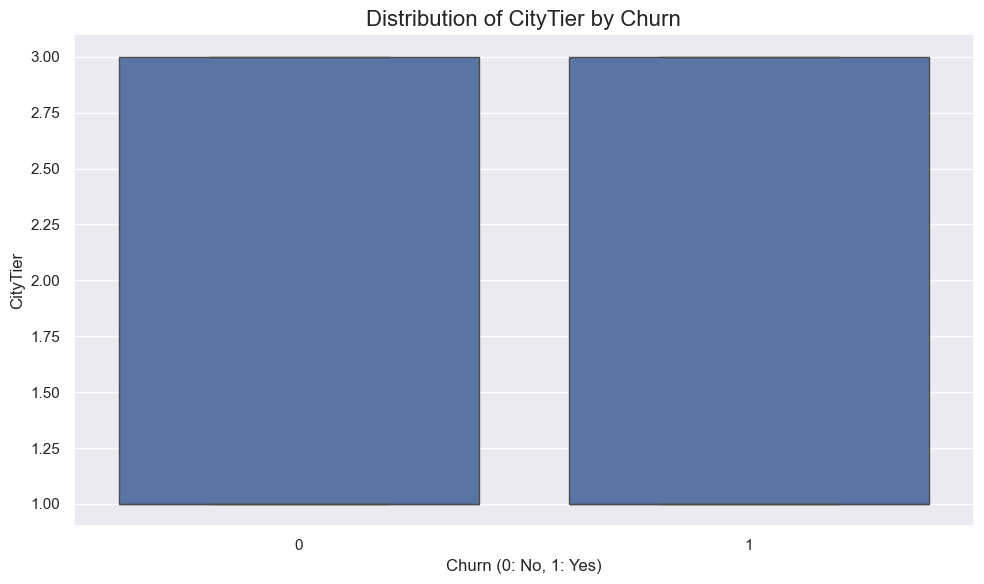

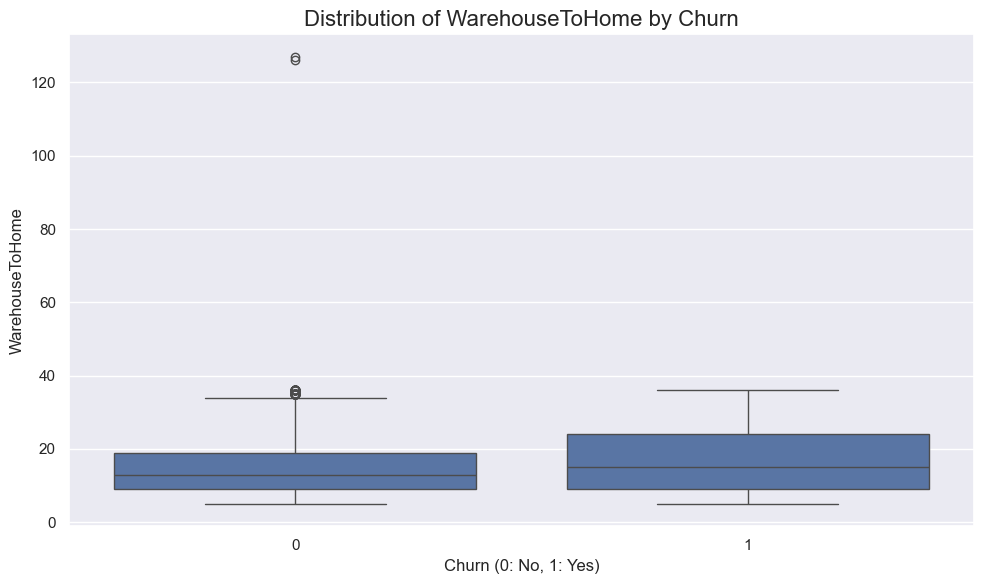

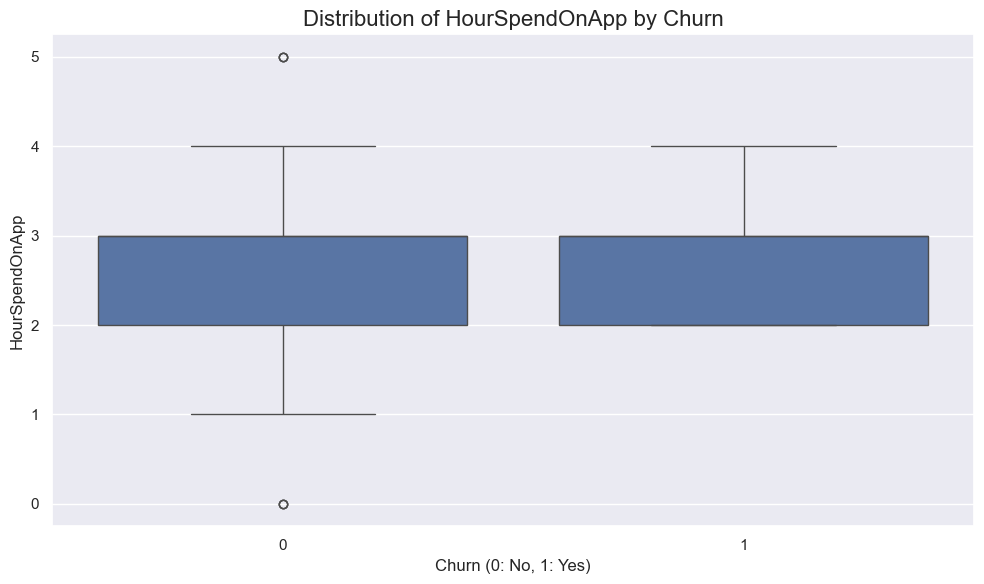

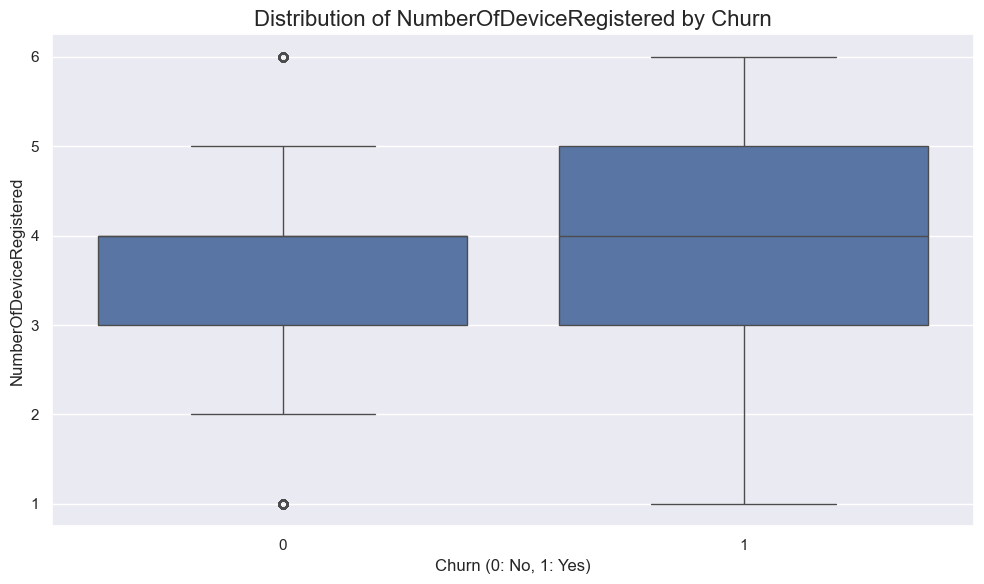

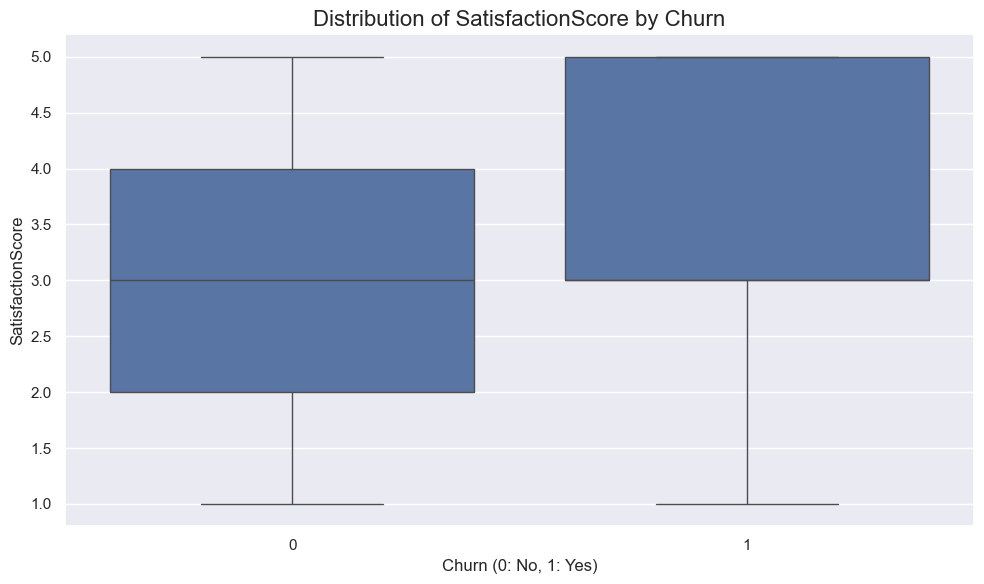

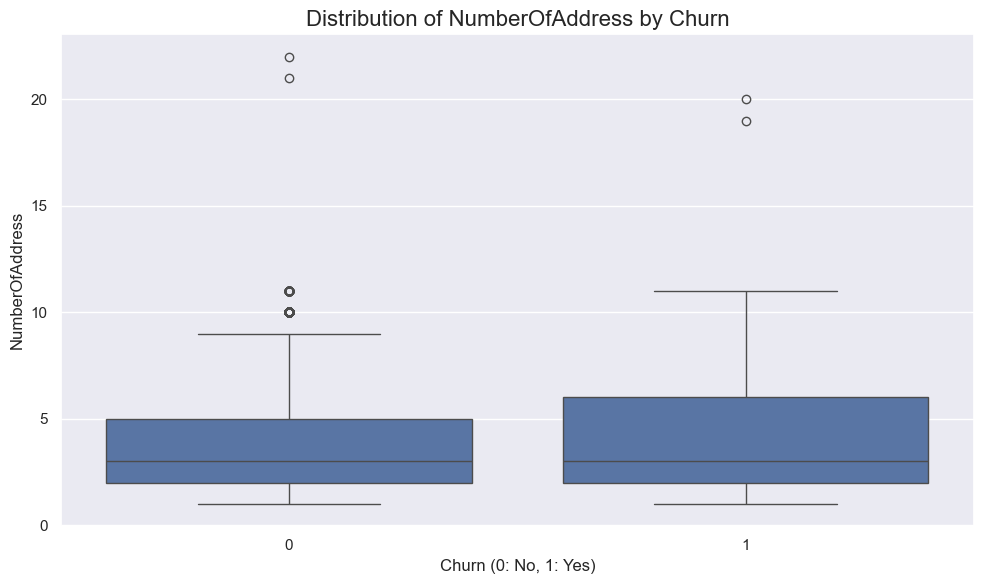

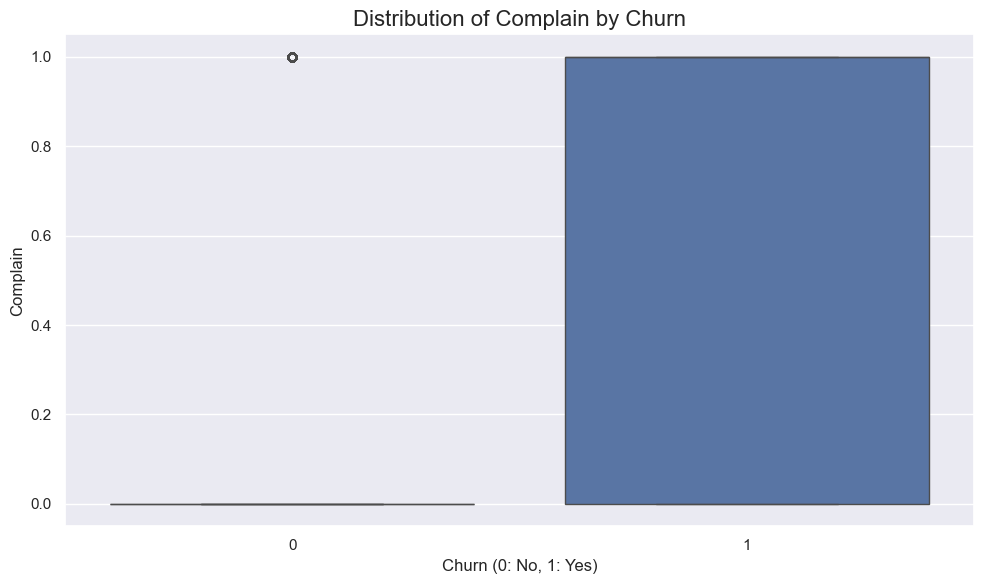

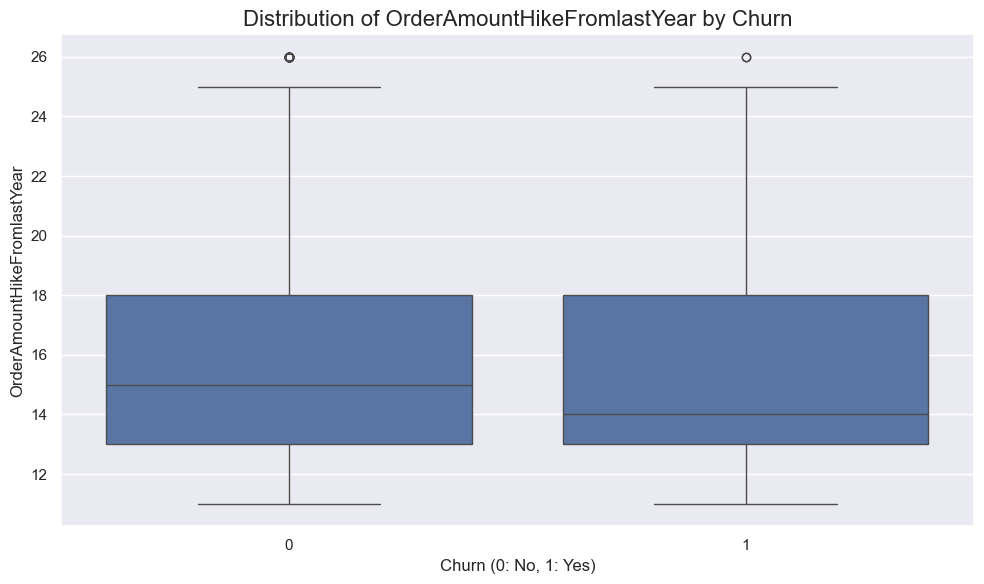

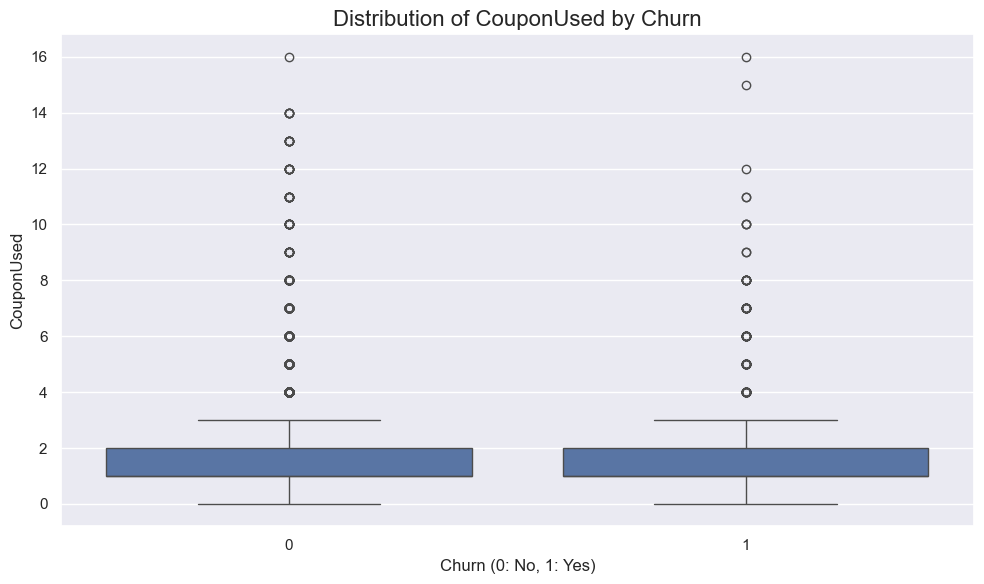

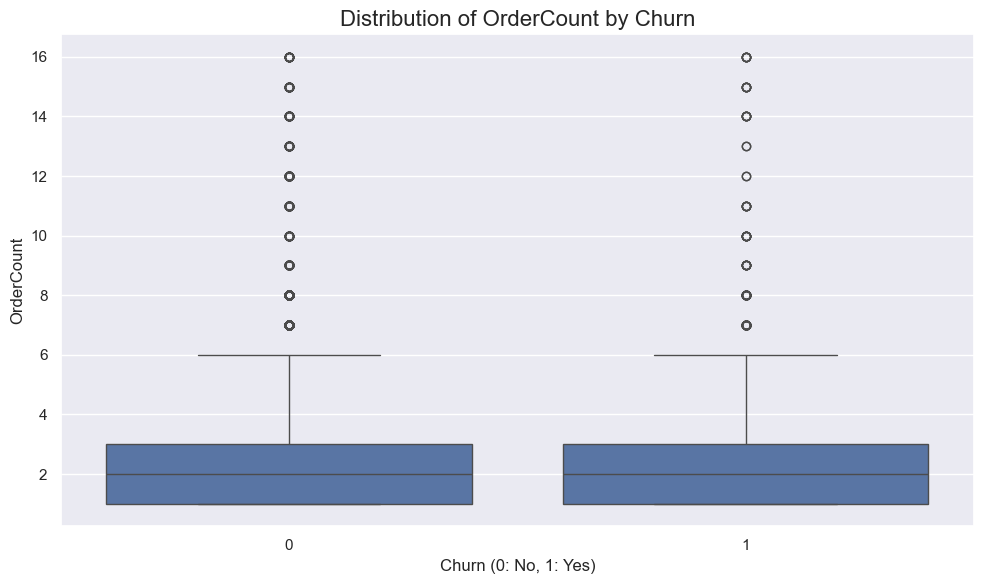

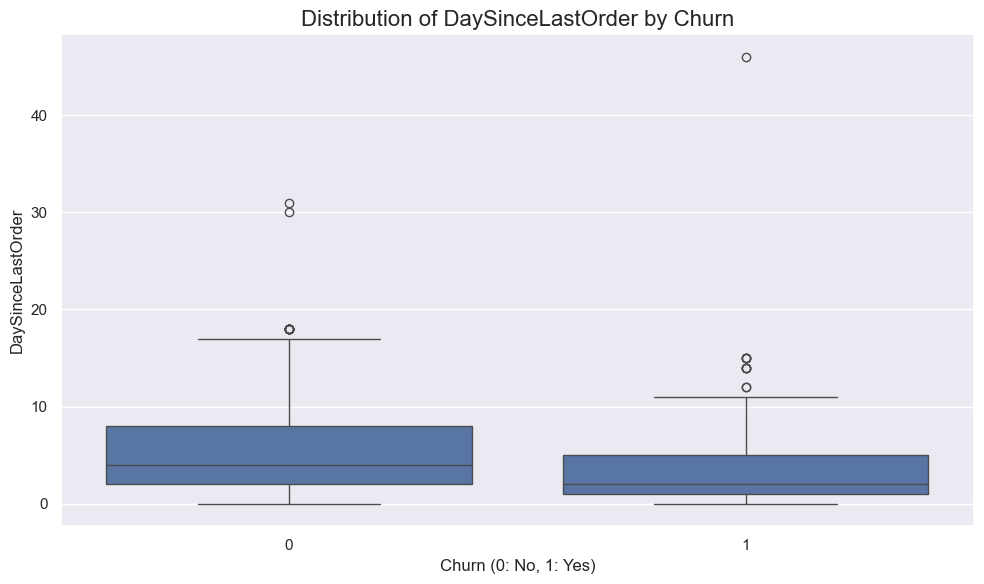

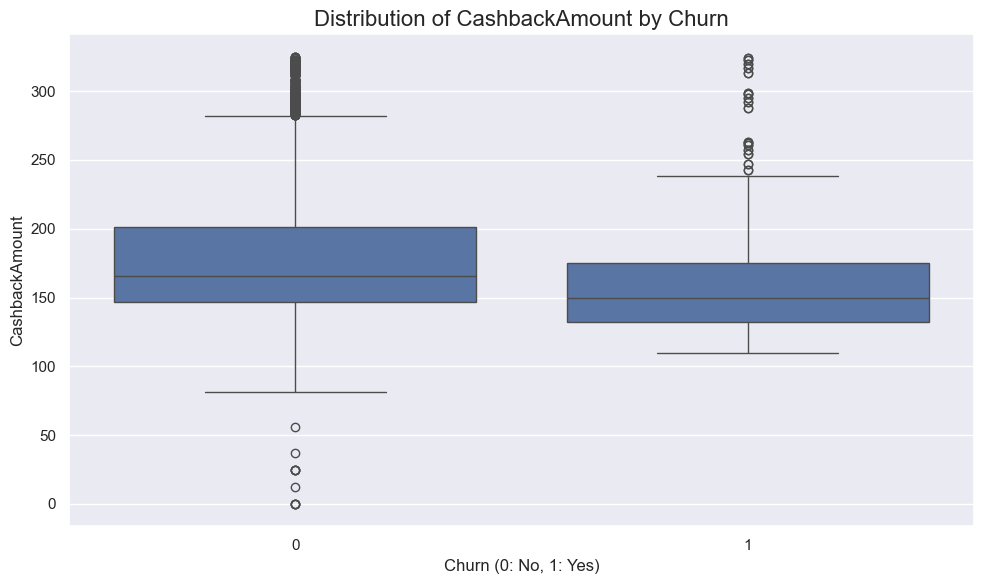

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f'Distribution of {col} by Churn', fontsize=16)
    plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.savefig(f'{col}_vs_churn_boxplot.png')
    plt.show()

## Bivariate Analysis (Categorical Features)

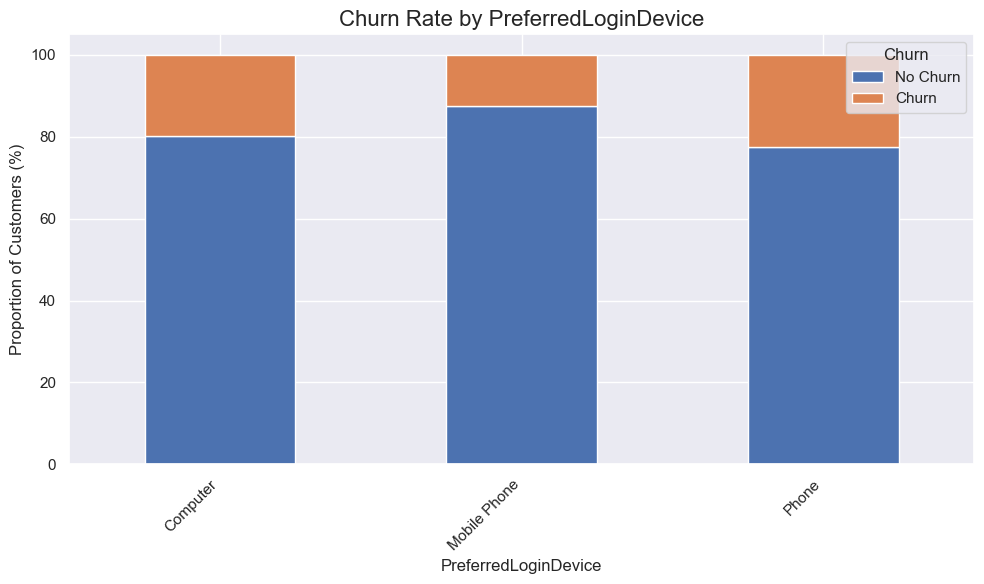

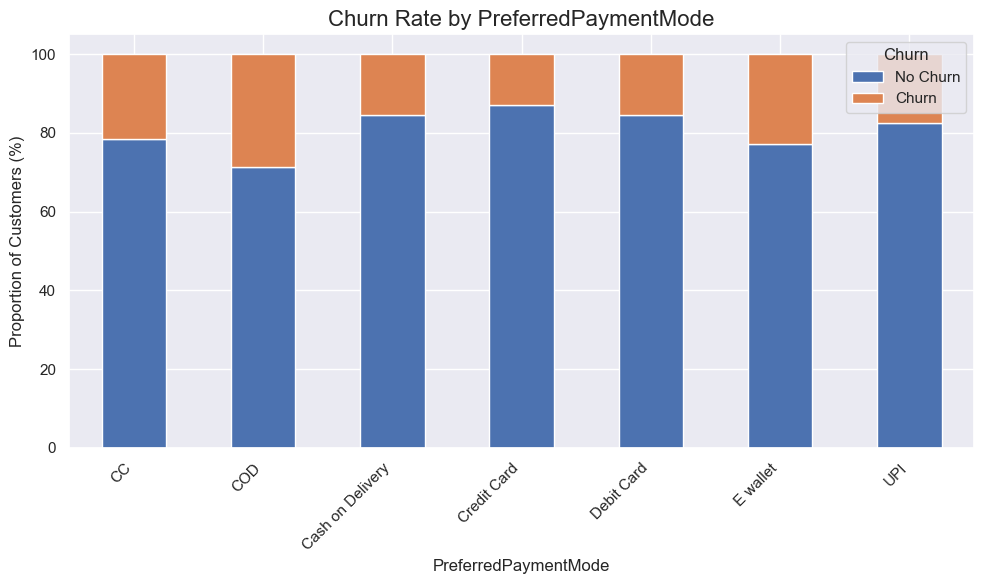

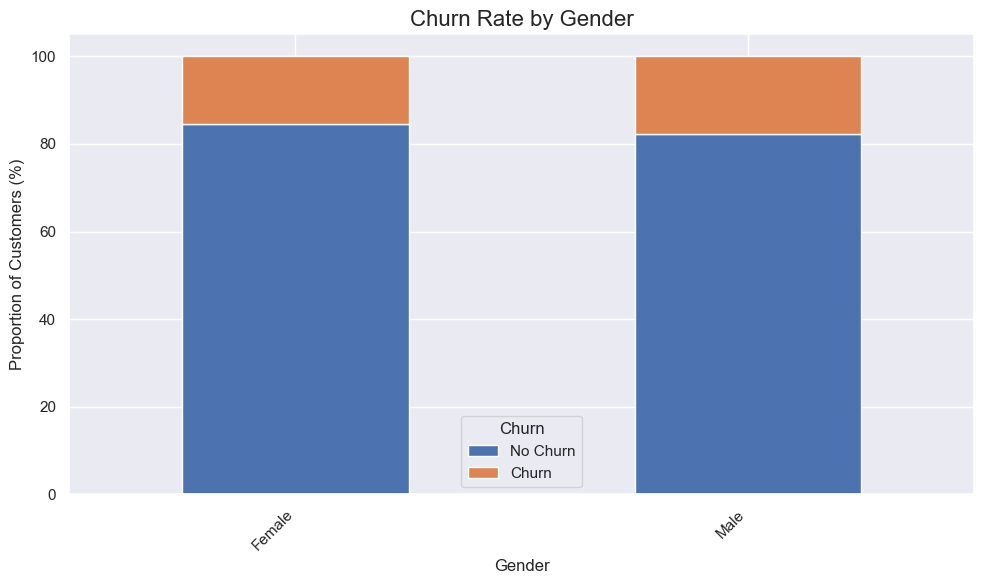

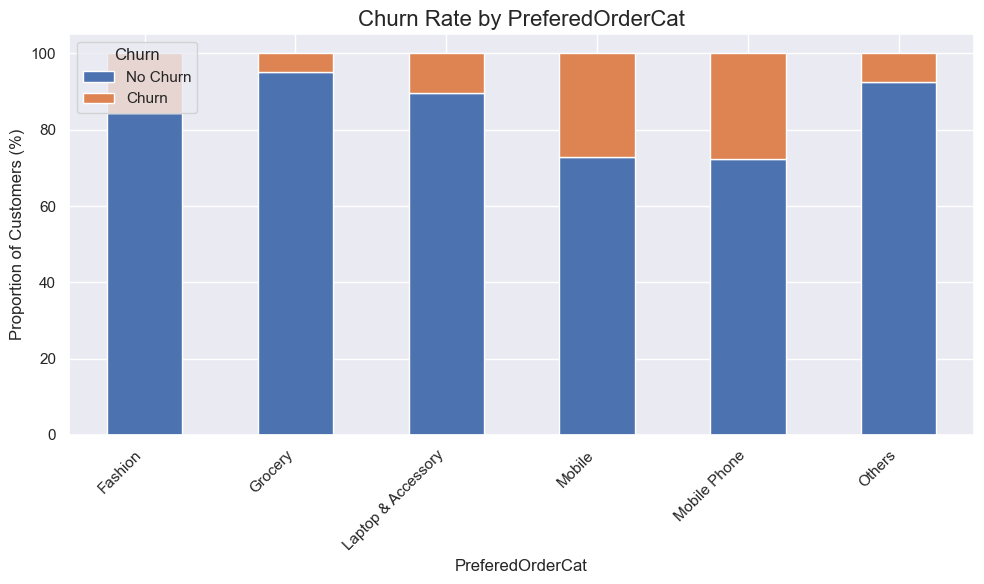

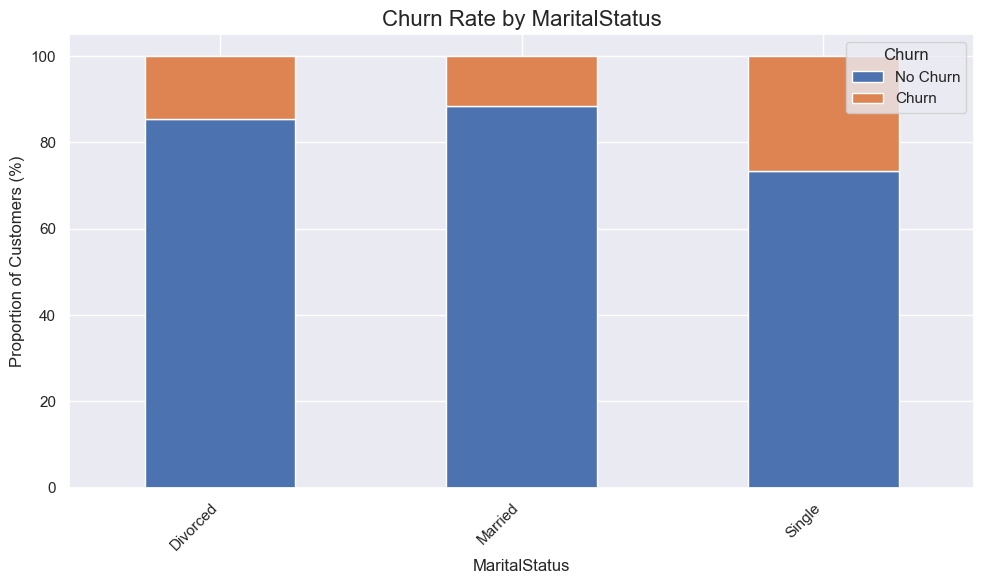

In [14]:
for col in categorical_cols:
    if col != 'Churn':
        # Calculate the proportion of churn for each category
        churn_by_cat = data.groupby(col)['Churn'].value_counts(normalize=True).unstack().mul(100)
        
        # Create a stacked bar chart
        churn_by_cat.plot(kind='bar', stacked=True, figsize=(10, 6))
        
        plt.title(f'Churn Rate by {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Proportion of Customers (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Churn', labels=['No Churn', 'Churn'])
        plt.tight_layout()
        plt.savefig(f'{col}_vs_churn_stacked_bar.png')
        plt.show()

## Correlation Analysis (Numerical Features)

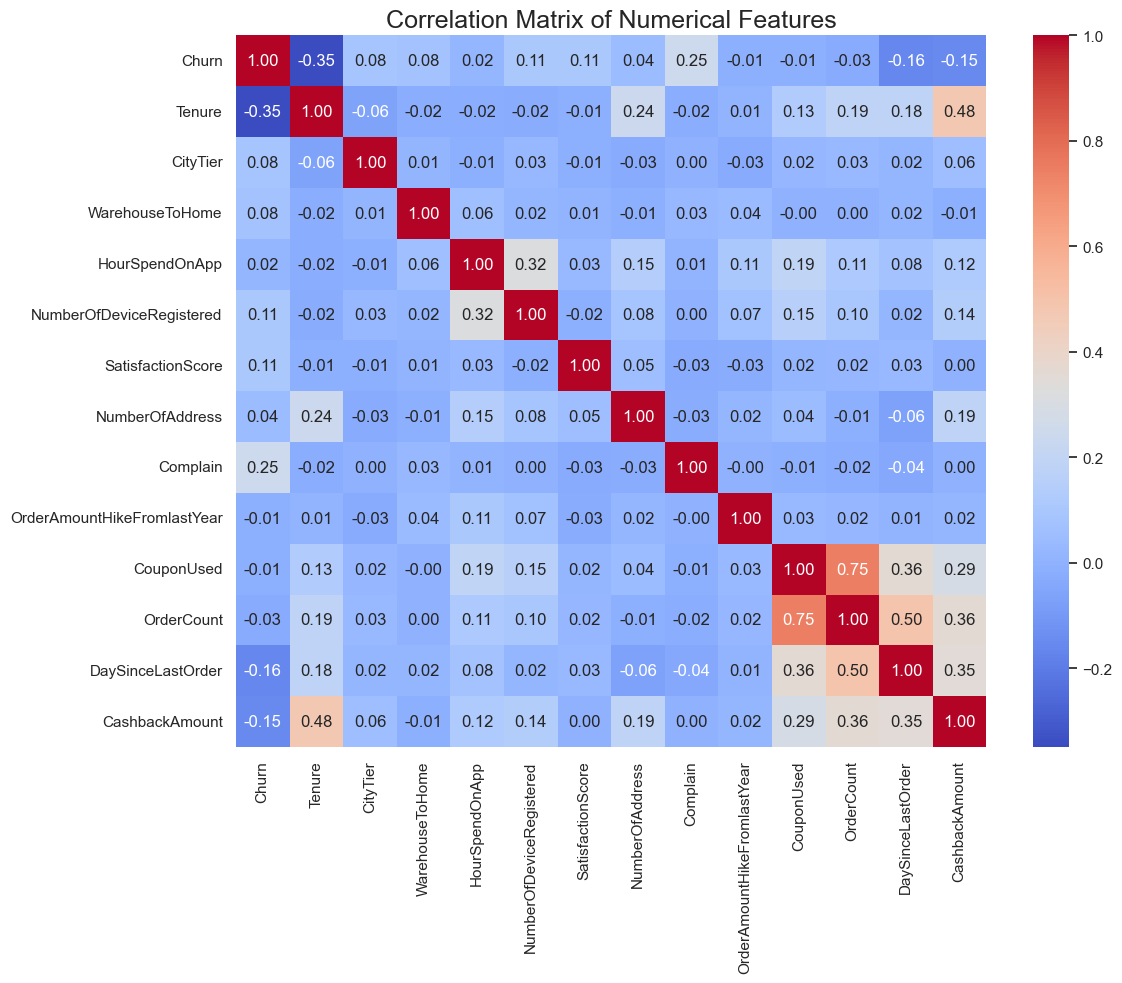

In [15]:
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=18)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

## Statistical Analysis and Hypothese testing

In [16]:
### Installing the SciPy library
from scipy.stats import chi2_contingency, ttest_ind

#### Test 1: Chi-Square Test for MaritalStatus vs. Churn

In [17]:
contingency_table = pd.crosstab(data['MaritalStatus'], data['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

Chi-Square Statistic: 188.6710
P-value: 0.0000


In [18]:
print(contingency_table)

Churn             0    1
MaritalStatus           
Divorced        724  124
Married        2642  344
Single         1316  480


In [19]:
contingency_table = pd.crosstab(data['Complain'], data['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

Chi-Square Statistic: 350.9255
P-value: 0.0000


### Test 2: Independent Samples t-test for Tenure vs. Churn

In [20]:
data_clean = data.dropna(subset=['Tenure'])
tenure_churned = data_clean[data_clean['Churn'] == 1]['Tenure']
tenure_not_churned = data_clean[data_clean['Churn'] == 0]['Tenure']
t_stat, p_value_ttest = ttest_ind(tenure_churned, tenure_not_churned, equal_var=False)
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_ttest:.4f}")

t-statistic: -36.1572
P-value: 0.0000


# Summary and Conclusions

Based on the comprehensive analysis, here are the key variables contributing to churn and the reasons why, supported by the plots and statistical tests.

### 1. Customer Tenure
**Why it matters:** Tenure is the single most important variable contributing to churn. The analysis revealed a strong and statistically significant relationship between how long a customer has been with the company and whether they churned. The box plot for `Tenure` showed that churned customers have a very low median tenure, indicating that the churn problem is primarily an **early-life churn issue**.

### 2. Complaint History
**Why it matters:** The presence of a complaint is a critical warning sign for churn. The stacked bar chart for `Complain` vs. `Churn` showed that customers who have complained have a dramatically higher churn rate. This suggests that unresolved or poorly handled complaints are a major driver of customer loss.

### 3. Days Since Last Order
**Why it matters:** The number of days since a customer's last order is a powerful predictor of churn. The box plot for `DaySinceLastOrder` showed that churned customers have a significantly higher median number of days since their last purchase. This indicates that customer inactivity is a strong precursor to churn.

### 4. Order Count
**Why it matters:** The number of orders a customer has placed is directly related to their likelihood of churning. The box plot for `OrderCount` showed that churned customers have a significantly lower median number of orders. This highlights that customers who make only one or two purchases are at a much higher risk of leaving.

### 5. Marital Status
**Why it matters:** A customer's marital status is a significant demographic factor. The stacked bar chart for `MaritalStatus` vs. `Churn` showed that **single customers have the highest churn rate**. The Chi-Square test confirmed that this relationship is statistically significant, meaning the difference in churn rates across marital statuses is not due to random chance.

### 6. Other Contributing Factors
While less influential than the variables above, these factors also show a relationship with churn:

* **Preferred Payment Mode:** Customers who prefer 'Cash on Delivery' (COD) have a higher churn rate.
* **Preferred Login Device:** Customers using a generic 'Phone' as their login device have a slightly higher churn rate compared to those using 'Mobile Phone' or 'Computer'. This could point to a poorer user experience on specific mobile platforms.
* **Warehouse-to-Home Distance:** The median distance to the warehouse is slightly higher for churned customers, suggesting that longer delivery times or higher costs may contribute to dissatisfaction and churn.
* **Hours Spent on App:** Customers who spend fewer hours on the app are slightly more likely to churn, indicating that engagement is a factor in retention.